<img src="attachment:webscraping.png" width="200">

# Introduction to Web scraping in Python

Supported by DS2F Fellowship

November 12, 2020 11-12:30 PM Zoom

Instructor: Sabrina Nardin, Sociology PhD Candidate

## Getting Started

To participate in this workshop, you only need a computer and an internet connection (I suggest using a relatively up-do-date version of a browser like Chrome, Safari, or Firefox). If after the workshop you want to save this Jupyter notebook on your computer, go under File > Download as > and select your preferred format. You can also find a version of this workshop on my GitHub repo: insert link

Let's try to run a code in Jupyter

In [2]:
# print welcome message (to execute this code: click the Run button at the top of the screen or press Ctrl+Enter)
print("Welcome to this workshop!")

Welcome to this workshop!!


In [4]:
# create a variable that holds the welcome message
welcome = "Welcome (again) to this workshop!"
print(welcome)

Welcome (again) to this workshop!


A couple of other useful things for this workshop:
* It might happen that you get disconnected from the cloud (i.e. you would not be able to run code and the little chain on the right top corner will be broken). To reconnect, you need to click again on the link I provided in the chat to re-build the environment. Once it is rebuilt, make sure to re-run the code you had before the disconnection
* If you re-create the environment after the workshop, remember that the changes you do on the code won't be saved on the cloud, so make sure to download and save it on your laptop <span style='color:Red'> NOTE: Check if this is correct </span>

## Learning Objectives

By the end of this workshop you will be able to...
* Conceptualize web scraping as a process that goes from the website to the cleaned data
* Read an html page and evaluate it (identifying and deciding which tags to use)
* Use the library “requests” to interact with servers
* Use the library “beautiful soup” to parse and scrape data
* Solve some of the key tasks in static scraping: deal with errors, handle missing data, turn pages, (store html pages?)

## What is Web Scraping?

* Web scraping is the process of gathering or "scraping" information from a website and pertains to the data collection phase of a project 
* If you have ever copied and pasted information from the internet, you have performed the same task of any web scraper, just on a small scale. Web scraping allows to automate this process to collect hundreds, thousands, or millions information.
* It usually targets structured data: for example collect companies's names, emails, phones, newspaper articles, prices, etc.

There are mainly two ways to extract data from a website (with Python, R, etc.):
1. Using the API (Application Programming Interface) provied by the website. This option is always preferable if an API is available (Facebook, Twitter, YouTube, etc. all have their own APIs)
2. Directly access the HTML of the webpage -- we focus on this today!

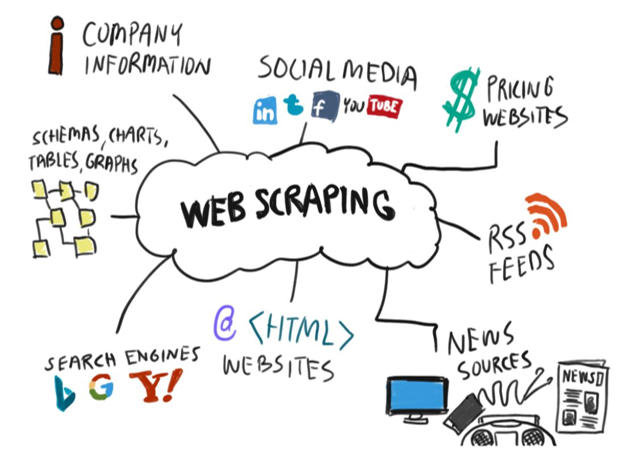

## Ethics of Webscraping
<span style='color:Red'> NOTE: Move this at the end? </span>

1. Private data (not OK!) vs. public data (OK!). If there is a password or other barriers by the host site: it is likey private data


2. Check the “robots.txt” file before you scrape, by adding /robots.txt at the end of your url
    - Example NYT Robot File: https://www.nytimes.com/robots.txt (the star in the User Age stays for "all robots")
    - Further info: https://www.robotstxt.org/robotstxt.html
    
                                                         
3. Read the website’s Terms of Service (ToS): these are the legal rules you agree to observe in order to use a service. Some people follow it, others do not


4. If the website has an API, use it
    - Example on how to use API to scrape NYT news: https://martinheinz.dev/blog/31
    - Further info on news media APIs: https://en.wikipedia.org/wiki/List_of_news_media_APIs
                                                                   

5. Take a look at the "hiQ Labs v. LinkedIn" lawsuit case
https://www.abajournal.com/lawscribbler/article/scraping-a-public-website-isnt-a-crime


6. Some things to keep in mind while you scrape to avoid being banned:
    - be slow: webscraping consumes server resources from the website you are scraping, make sure to use a conservative rate when making requests to a server (e.g. 1 request every 10 seconds or set a random number)
    - save and store the content of what you scrape, so to avoid scraping it again if you need it in the future
    - be identifiable: identify your scraper with a "user agent string" that allows to identify your client browser information
    - example code: <code>user = { "User-Agent" : "News Extractor youremail@gmail.com" } 
    response = requests.get("put here the url you want to scrape", user)
    time.sleep(10)</code>

## Install Packages

In [7]:
# install packages we need for the workshop (nothing to edit here, but it’s important to make sure we run this block)
import requests 
from bs4 import BeautifulSoup
from requests.exceptions import HTTPError
import time
import re
import pandas as pd

Requests and Beautiful Soup are the two main webscraping libraries we need for this tutorial: 

* <b>Requests</b>: to get the data. It sends HTTP requests to web servers and allows you to access the response 
    
* <b>Beautiful Soup (bs4)</b>: to parse the data. It allows to navigate and extract data from HTML and other markup languages. Basically it helps to navigate the html tree by parsing it and to extract the desired tags

NB: Encoding (i.e. transforms bytes into characters like strings), is an important thing in webscraping. We won't go into detail, just remember that when the library "requests" gets the data, it encodes them for you, the most common encoding is UTF-8 which is good for English and most language, but not all

Let's make a requests and parse the response with Beautiful Soup and see what happens:

In [ ]:
# make an http requests to the server, get the html data that the server sends back, and store the response in an object

url = "https://linguistics.arizona.edu/peo-faculty"
response = requests.get(url)
print(type(response))

In [ ]:
# check the status code and the encoding of our response

print("Response code is:", response.status_code) # 200 is OK! codes that start with 4 or 5 indicate errors
print("Encoding is:", response.encoding)

In [ ]:
# you can specify your user-agent info as you make the requests
# use a dictionary where key is the user agent and the value is a valid user agent string
# SHOULD I DELETE THIS?

url = "https://linguistics.arizona.edu/peo-faculty"
user = { "User-Agent" : "add a valid user agent string here" } 
response = requests.get(url, user)

# more info: https://developers.whatismybrowser.com/useragents/parse/?analyse-my-user-agent=yes

In [ ]:
# to be able to parse our response object with Beautiful Soup, we need to access its content

# we can do it by using the content property
response_content = response.content
print("Content properties gives us:", type(response_content))

# or the text property
response_text = response.text
print("Text property gives us:", type(response_text))

In [ ]:
# create a soup object and parse it with the html parser

soup = BeautifulSoup(response_content, "html")
print('Soup is:', type(soup))

In [ ]:
# print out the html content of the page formatted nicely with the prettify method
# note that beautiful soups operates directly on the byte: does the encoding for us, and parses the html for us

print(soup.prettify())

## What is behind a Web Page...

<span style='color:Red'> NOTE: put this part at the end (like as additional info that you won't cover) but incorporate some of the info from the secion on HTML tags, ids, and class attributes during the hands-on parts of the lesson where appropriate.  Think at how to do it and what to include/leave out </span>

<span style='color:Red'> I liked the inspection of the web page, to show the underlying HTML code. That might be something that you do but instruct your audience not to do. Given differences among web browsers, it might create unnecessary confusion for your audience to try to navigate  </span>

### *Web Browsers & Web Servers*

Computers talk to each other by making and receiving <b>data requests</b>: when you click on a page, your web browser makes a request ("requests.get") to the web server of that page and gets back a response object.

For example, if you type https://sociology.arizona.edu/news into your <b>web browser</b>, you are telling the arizona <b>web server</b> that you would like to visualize the information stored at /news and that the protocol of your request is <code>http</code> The arizona web server receives your request and sends back to your web browser a reponse, i.e. a bunch of files. Finally, your browser transforms these files into a nice visual display that might include texts, graphics, hyperlinks, etc.

### *What is the nice visual display made of?" 

Usually a web page includes the following:

* <b>HTML</b> the core element of a webpage, basically one or more text files written in HTML or Hypertext Markup Language
* <b>CSS</b> which means Cascading Style Sheets, basically it adds styling to make the page looks nicer 
* <b>JS</b> Javascript code is used to add interactivity to the page (and you need "dynamic webscraping" to interact with it)
* <b>Images</b> for example jpg and png allow webpages to show pictures, other common stuff are videos or multimedia


## HTML language: tags and attributes

HTML, like XML, is not a programming language, like Python, but is a <b>markup language</b>: it uses a set of rules or tags to  organanize the webpage (i.e. makes the text bold, creates body text, paragraphs, inserts hyperlinks, etc.), but when the page is displayed the markup language is hidden

### *A few things about tags in HTML*
* tags follow a tree-like structure and are nested 
* tags go in pairs: one on each end of the content that they represent, the first is the start tag, the second is the end tag 

Tree structure:
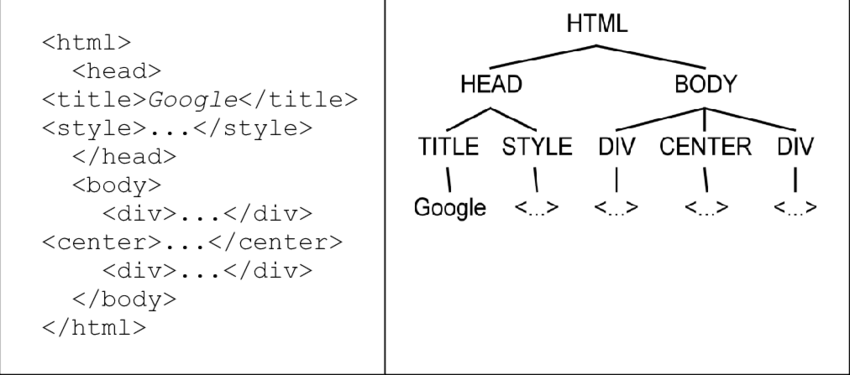

A toy example: 
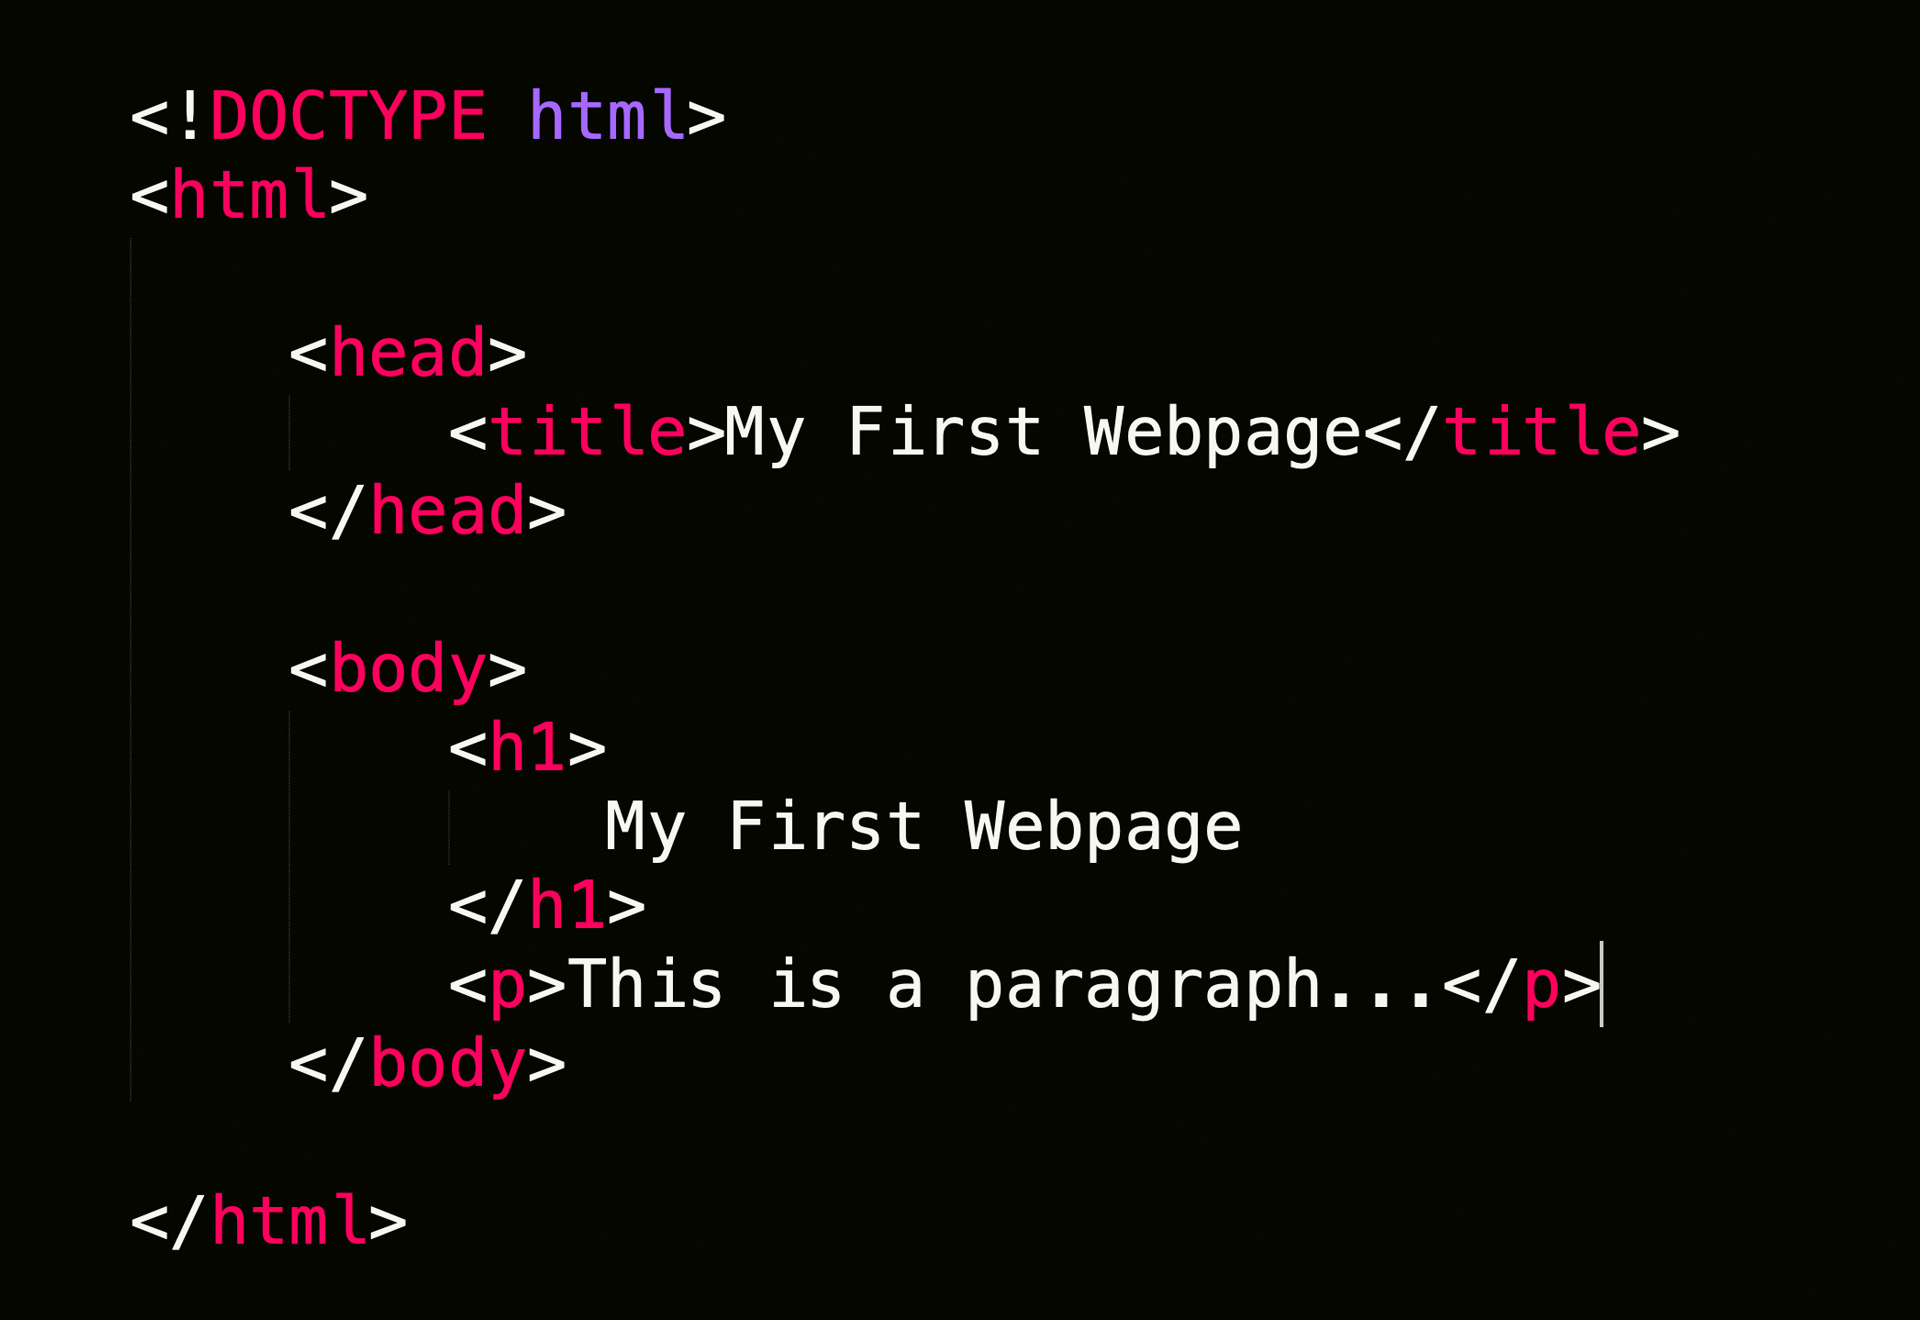

A real example is more messy: https://linguistics.arizona.edu/peo-faculty

Most common HTML tags:
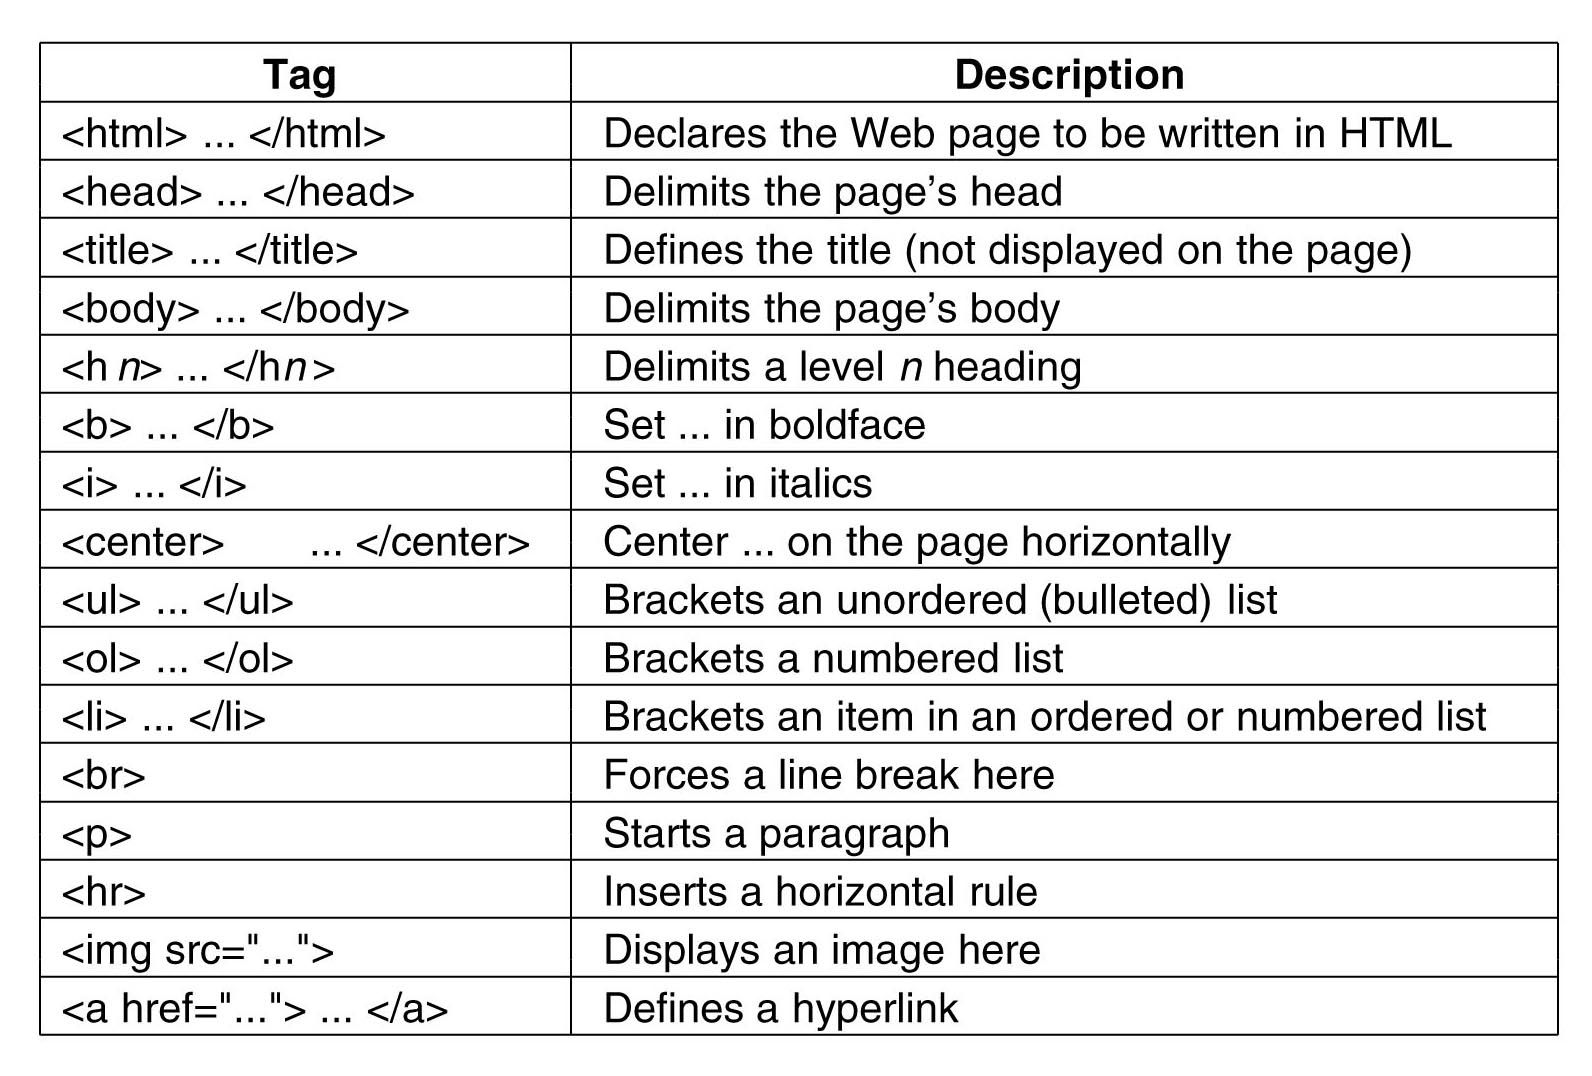

A note on <b>Hyperlinks</b> as you are reading a page, you can click on a hyperlink and be taken to other pages. In web scraping hyperlinks are important since in many projects we want to collect them. They are inside the a href tag as shown in the table above (the href is a property of the tag that determines where the link goes) 

More on tags and CSS selectors (cheet sheets for webscraping tasks): 
* https://developer.mozilla.org/en-US/docs/Web/HTML/Element
* https://www.w3schools.com/html/html_elements.asp
* https://www.w3schools.com/css/default.asp

### *A few things about class and id attributes*
* class and id are special attributes that specify more information for an html tag, usually a certain style
* are optional not all elements have them, but can be used to all of them
* the same class can be shared between elements but each element can only have one id

In web scraping tasks they are important because we can find what we want by class or by id. Since they offer quite detailed information, they help to find the specific element we want to scrape.

Let's take a look at this example from https://linguistics.arizona.edu/peo-faculty

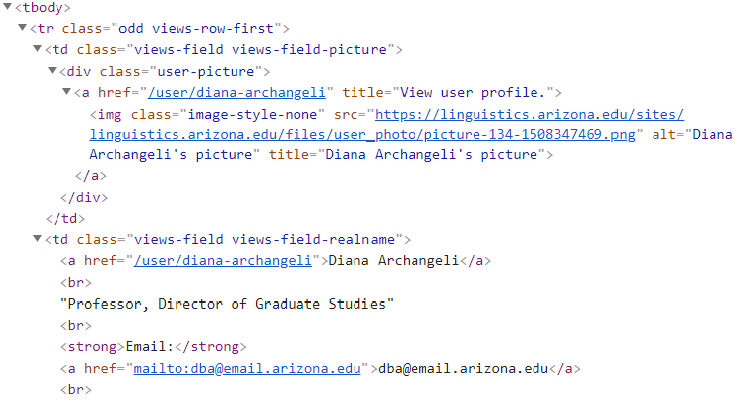

Some common beautiful soup methods:

In [ ]:
# find(): finds only the first instance of a tag, returns a single bs object
print(soup.find('p'))

In [ ]:
# you can then extract only the text from your p by adding .text
paragraph = soup.find('p').text
print(paragraph)

In [ ]:
# find_all(): finds all the instance of a tag on a page
all_p = soup.find_all('p')
print(all_p)

In [ ]:
# get_text: gets all of the text inside a specific tag
# find_all() returns a 'p' tags, so we have to loop through it or use list indexing to extract the text with get_text()
# ask them to get the second
print(soup.find_all('p')[0].get_text())

In [ ]:
# anything else? add a couple of more commands

## Example 1: extract all faculty's names and phone numbers from one page

<span style='color:Red'> NOTE: Ask Megan and Jeff input on this 
    and on how to incorporate tags stuff in there w/o going over them before </span>

In [ ]:
# we use the same website (https://linguistics.arizona.edu/peo-faculty), so we have already made a requests and parsed it 

# get the names
names = []
for row in soup.find_all('td', {'class': 'views-field views-field-realname'}):  # <td class="views-field views-field-realname">
    name = row.find('a').text # find all 'a' tags and get only the text
    #print(name)
    #print(type(name))
    names.append(name) 
print(names)

In [ ]:
# exercise: can you get the phone numbers/
# copy and past the above code here and modify it 

In [ ]:
# get the phone numbers (solution)
phones = []
for row in soup.find_all('td', {'class': 'views-field views-field-realname'}):
    if row.find_all('strong', text="TEL:"): 
        tel = row.find('strong', text="TEL:").next_sibling # next_sibling gets the text
        tel = re.sub('^ *','',tel) # get rid of the extra space before tel
    else:
        tel = 'NA'
    phones.append(tel)
print(phones)

The "next_sibling" tag we used to extract the phone numbers reminds us that tags have commonly used names that depend on their positions in relations to other tags:
* child: the tag inside another tag (e.g. the p tag is usually a child of the body tag)
* parent: the tag that contains another tag (e.g. the html tag is the parent of the body tag)
* sibling: two tags are siblings if they are nested inside the same parent

In [ ]:
# merge the two lists of same length (names and phones) into a list of tuples
def merge(list1, list2): 
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

(merge(names, phones))

In [ ]:
# another way to do to the same thing at once
names_phones = []
for row in soup.find_all('td', {'class': 'views-field views-field-realname'}):
    name = row.find('a').text
    try:
        tel = row.find('strong', text="TEL:").next_sibling  
        tel = re.sub('^ *','',tel) # get rid of the extra space before tel
    except:
        tel = "NA" 
    names_phones.append([name,tel])  

# print results line by line and alphabetically
for row in sorted(name_phones):
      print(row)

Other examples of extracting contact informations:
* congress.gov: https://medium.com/@lobodemonte/congress-gov-web-scraping-with-beautifulsoup-37af19f2e1f4
* add another link

## Example 2: extract articles info from multiple pages of an online newspaper archive

<span style='color:Red'> NOTE: Change this example with smt in English, use this as base code 
https://medium.com/better-programming/how-to-scrape-multiple-pages-of-a-website-using-a-python-web-scraper-4e2c641cff8
which scrapes movie reviews at https://www.imdb.com/search/title/?groups=top_1000&ref_=adv_prv
Is it OK to reuse part of it if I give credits? Megan mentioend that is "okay to re-use someone else’s example if they shared their materials through something like a creative commons license" but this is just a medium article
I can develop my own additional example for the written tutorial (or use my italian one below?) but for the workshop it will spare me time not to do it from scratch
</span> 

In [ ]:
Learning objectives:
Reinforce all learning objectives of Example 1 and add the following two
1. scrape data from multiple page in loops (create list, turn page)
2. deal with errors (from requests.exceptions import HTTPError) to avoid the whole thing to get stuck
3. write list to file

#### STEP 1: Check the website (here query the archive), observe the results, decide what you want to extract

* webpage https://ricerca.repubblica.it/ricerca/repubblica
* the search for "covid" AND "trump" from March 1, 2020 to October 1, 2020 gives 752 results in 6 pages
* webpage with results of the query:
https://ricerca.repubblica.it/ricerca/repubblica?query=%22covid%22+AND+%22trump%22&fromdate=2020-03-01&todate=2020-10-29&sortby=score&author=&mode=all

#### STEP 2: Inspect your website with developer tools to identify where the info you want to extract are located

* from this newspaper website: we want to extract title, paragraph, and the date
* make sure to spend some time inspecting and understanding the structure of the website before moving forward: every website is different and the html can be overwelming (tip: use the dev tools to explore it interactively)

#### STEP 3: Generate the list of urls you want to scrape

In [ ]:
def generateUrls(search_term, start_year, end_year, start_page, end_page):
    """
    Generate a list of urls to scrape.
    :return (type str): a list of urls
    """
    base_url = ("https://ricerca.repubblica.it/ricerca/repubblica?author=&sortby=adate&query=" + str(search_term) +
                "&fromdate=" + str(start_year) + "-01-01&todate=" + str(end_year) + "-12-31&mode=all&page=") 
    
    # this is to avoid adding +1 to the max_page when funct is called
    end_page = end_page + 1 
    
    # generate individual urls from the base url
    urls = []  
    for page in range (start_page, end_page): 
        urls.append(base_url + format(page))   
    #print('length:', len(urls)) 
    
    return urls

In [ ]:
covid_urls = generateUrls('"covid"+"trump"', "2020", "2020", 1, 3)

#### STEP 4: Requests and get the html

In [ ]:
def requestHtml(input_urls):
    """
    Takes each url from the list of generated urls, sends https 'requests' to the website,
    saves the requested results in 'response', which is then transformed in a .txt format 
    this way the requested data can be accessed later w/o making other requests to the website
    :param input_urls (type list): list of urls to be scraped
    :return (type list): all requested html pages
    """
    html_requested = []
    count = 0 
    
    for url in input_urls: 
        print('request ' + str(count))
        count = count + 1
        
        # try/except to catch encoding and requests errors that might occur
        try:  
            response = requests.get(url)
            response_text = response.text
            # status: 200 successful, 404 not found; encoding: utf-8 and ISO-8859-1 which is latin-1 
            print("Status:", response.status_code, " Encoding:", response.encoding)  
            response.raise_for_status()
            #time.sleep(5) 
            time.sleep(random.randint(3, 6))
            
        except HTTPError as http_err:
            print(f'HTTP error occurred: {http_err}')
            response_text = str(http_err.args) # default format of .args is a tuple
            pass  # pass to stay in the loop and store this result 
       
        except Exception as err:
            print(f'Other error occured: {err}')
            response_text = err
            continue  # continue to exit the loop and goes at beginning by skipping this result
        
        html_requested.append(response_text)  # append results as list of strings
        
        # clean the requested html urls
        html_requested = [x.strip('') for x in html_requested]
        html_requested = [x[ : -1] for x in html_requested]
       
    return html_requested

covid_requested = requestHtml(covid_urls)

#### STEP 5: Soupt the requested html

In [ ]:
def soupHtml(html_requested):
    """ 
    After having requested and saved the html pages, use beautiful soup to parse the collected htlm pages
    notes this is the same funct i used in 'rep_art_1984-2019' script, see there for details on it
    :param html_requested (type list): all requested html pages
    :return (type bs object): souped html pages
    """
    html_souped = []
    for h in html_requested:
        soup = bs(h, 'lxml') # here i do not need the .text attribute (see response_text above)
        html_souped.append(soup)
    print('All links souped')
    return html_souped

In [ ]:
covid_souped = soupHtml(covid_requested)

In [ ]:
### STEP 6: GET THE DATA!

In [ ]:
def getMaindata(html_souped):
    """
    Go through each bs object in the list of souped pages, and then through each row of each bs object
    :param html_souped (type list): all souped html pages
    :return (pandas df): df with the main data extracted from the souped html pages 
    """
    
    count = 0     
    allvars = []
    
    # for each bs object in the list 
    for element in html_souped:  
  
        # and for each row of each bs object 
        for row in element.find_all('article'):  
       
            # initialize variables
            # clear variables at the end of each loop cycle to prevent from writing over the
            # results of the previous line if the current line is missing due to a code error
            title = 'ERROR'
            para = 'ERROR'
            date = 'ERROR'
            author = 'ERROR'
        
            # get title
            title = row.find(title="Leggi l'articolo").text   
            
            # get paragraph
            para = row.find('p').text              
            
            # get date
            date = row.find('time').text # from <time datetime="2012-03-13">
            
            # get author
            author = row.find_all("em", {"class": "author"}) # cannot use .text directly here
            for a in author:
                author = a.get_text() # if author is not there, this is automatically left blank (no need if/else)
                
            # append the collected data to 'allvars'
            allvar = [str(title),str(para),str(date),str(author)]
            allvars.append(allvar)
            
        # count variable to keep track of pages scraped
        # note: 1 page has 10 results, so if I have 3 pages then I should see 30 results
        print('Collecting data from page...', count)    
        count = count + 1
    
    print('Done collectng data!')
            
    # save all the collected data into a pandas df 
    df = pd.DataFrame(allvars)
    return df

In [ ]:
maindata_collected = getMaindata(covid_souped) 

In [ ]:
### STEP 7: CLEAN THE DATA

## Common Challanges of Web Scraping

* <b>Variety</b>: every website is different, so even if there are general recurrent structures, pretty much every website requires a new project
* <b>Change</b>: the same website might change over time, you might find that the script that you developed a few months ago does not work anymore but do not get discouraged, a few changes and will run again
* <b>Limits</b>: some websites set a maximum amount of data you can scrape at once (eg. repubblica 50 pages or 2500 articles, the solution is to break your requests)
* <b>Messy</b>: the scraped data are usually a bit messy and they need to be cleaned
* <b>Dynamic Scraping</b>: not really a challange but something to keep in mind that many websites incorporate javascript dynamic parts and Beautiful Soup is not good with dynamic scraping, but Scrapy and/or Selenium can help

## To sum things up...

In this workshop you learned how to...

* inspect the htlm structure of a website with your brownser's developer tools
* read and understand the html language to select the tags to extract the data 
* use the library Request to make a request to the server and get the page
* use the library Beautiful Soup to parse the downloaded html page and to extract the information
* turn pages, handle errors, and missing data
* clean and save your data 

## Credits

What is webscraping:
* webscraping image: https://blog.apify.com/what-is-web-scraping-1b548f8d6ac1

What is behind a webpage: 
* Mike Hammond's lectures LING 508 Computational Linguistic Fall 2019 
* https://www.dataquest.io/blog/web-scraping-tutorial-python/
* https://en.wikipedia.org/wiki/Web_page#:~:text=The%20core%20element%20of%20a,CSS)%20code%20for%20presentation%20semantics.

HTML language:
* html tree structure image: https://www.researchgate.net/figure/HTML-source-code-represented-as-tree-structure_fig10_266611108
* html toy example image: https://henryegloff.com/how-to-code-a-basic-webpage-using-html/
* html tags image: https://mason.gmu.edu/~kshiffl4/375/module5-2.html

Getting and Parsing Web Data:
* Install requests: https://requests.readthedocs.io/en/master/
* Install Beautiful Soup: https://www.crummy.com/software/BeautifulSoup/
* Bs4 documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
* Real python tutorial: https://realpython.com/beautiful-soup-web-scraper-python/
* Web scraping python and bs tutorial: https://www.dataquest.io/blog/web-scraping-tutorial-python/
* Beginner's guide to web scraping tutorial: https://opensource.com/article/20/5/web-scraping-python

In [ ]:
Markdown tricks https://medium.com/game-of-data/12-things-to-know-about-jupyter-notebook-markdown-3f6cef811707